Sinhgad College Of Engineering, Pune  
SE Computer Div-B   
Subject - Project Based Learning(PBL)  
Topic - Fake News Detection using Machine Learning  
205B023 - Dhanashree Gaikwad   
205B030 - Tanmay Jagtap  
205B037 - Savani Khutale  
205B039 - Kumar Kolhe  
205B040 - Kunal Patil

# Fake News Classifier

# Importing the Required Libraries

In [109]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
true = pd.read_csv('true.csv')
fake = pd.read_csv('fake.csv')

# Data Cleaning and Visualization

In [3]:
true.shape , fake.shape

((21417, 4), (23481, 4))

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [170]:
joblib.dump(true.head(),'true_head.csv')

['true_head.csv']

In [163]:
fake.head()

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Checking for any Null values

In [6]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Adding a column 'check' for both true and fake data  
True = 1  
False = 0

In [8]:
true['check']=1
fake['check']=0

Merging two Datasets true and fake to df

In [9]:
df=pd.concat([true,fake],axis=0)

In [10]:
df=df.sample(frac=1)
df.reset_index(inplace = True, drop = True)
df.head()

,title,text,subject,date,check
0,Irish border row thwarts May bid to clinch Bre...,BRUSSELS (Reuters) - Prime Minister Theresa Ma...,worldnews,"December 3, 2017",1
1,TICKING TIME BOMB: Why More Young Muslims In T...,These are statistics are shocking and very tel...,politics,"Mar 23, 2016",0
2,"As Syria war tightens, U.S. and Russia militar...","AL UDEID AIR BASE, Qatar (Reuters) - Even as t...",worldnews,"August 24, 2017",1
3,CHRISTIAN HIGH SCHOOL Told By State They Are N...,The drip drip drip of communism Leftists are s...,politics,"Dec 7, 2015",0
4,California voters turn down drug pricing initi...,LOS ANGELES (Reuters) - California voters turn...,politicsNews,"November 9, 2016",1


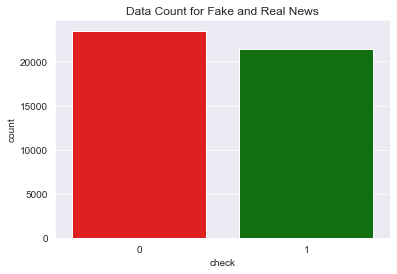

In [136]:
plt.title('Data Count for Fake and Real News')
sns.set_style("darkgrid")
sns.countplot(df.check,palette=['red',"green"])

From above we can see that it is Balanced Dataset

In [11]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'Data Count for Subject')

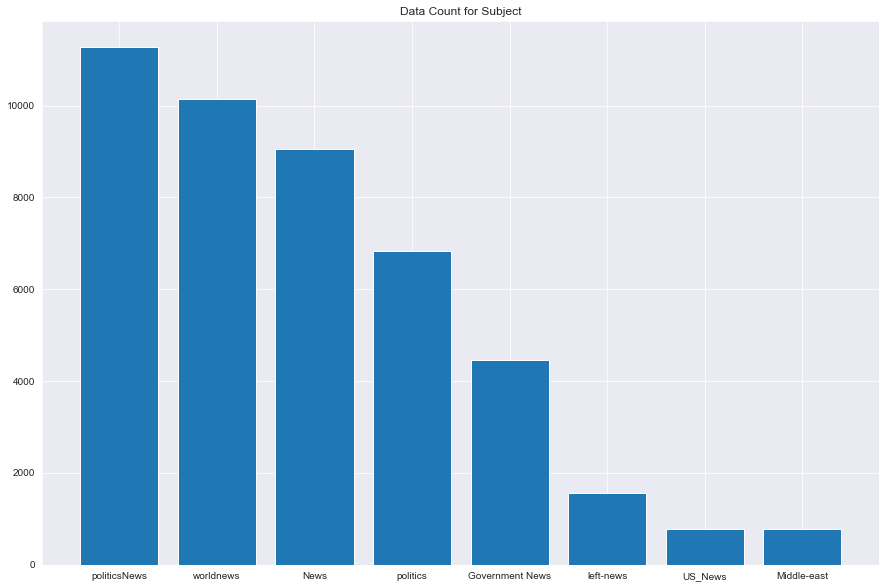

In [134]:
plt.figure(figsize=(15,10))
plt.bar(df['subject'].unique(),df['subject'].value_counts())
plt.title('Data Count for Subject')

Text(0.5, 1.0, 'Fake and Real Count for each Subjects')

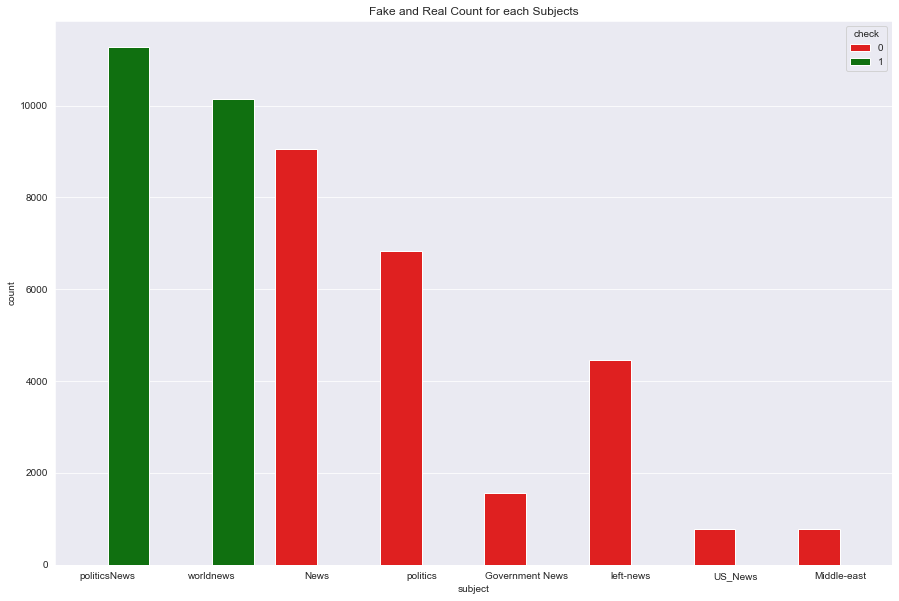

In [137]:
plt.figure(figsize=(15,10))
sns.countplot(x='subject',hue='check',data=df,palette=['red',"green"])
plt.title('Fake and Real Count for each Subjects')

From above we can see that subject topics for fake and true news are totally different  
So it is better to drop the subject column

Merging the 'title' and 'text' column into one column named 'Text'

In [12]:
df['Text'] = df['title'] +' ' + df['text']

In [13]:
#deleting the title, text, subject and text columns
del df['title']
del df['text']
del df['subject']
del df['date']

In [165]:
df.head()

,check,Text
0,1,Irish border row thwarts May bid to clinch Bre...
1,0,TICKING TIME BOMB: Why More Young Muslims In T...
2,1,"As Syria war tightens, U.S. and Russia militar..."
3,0,CHRISTIAN HIGH SCHOOL Told By State They Are N...
4,1,California voters turn down drug pricing initi...


In [171]:
joblib.dump(df.head(),'df_head with two col.csv')

['df_head with two col.csv']

Wordcloud for Real Text

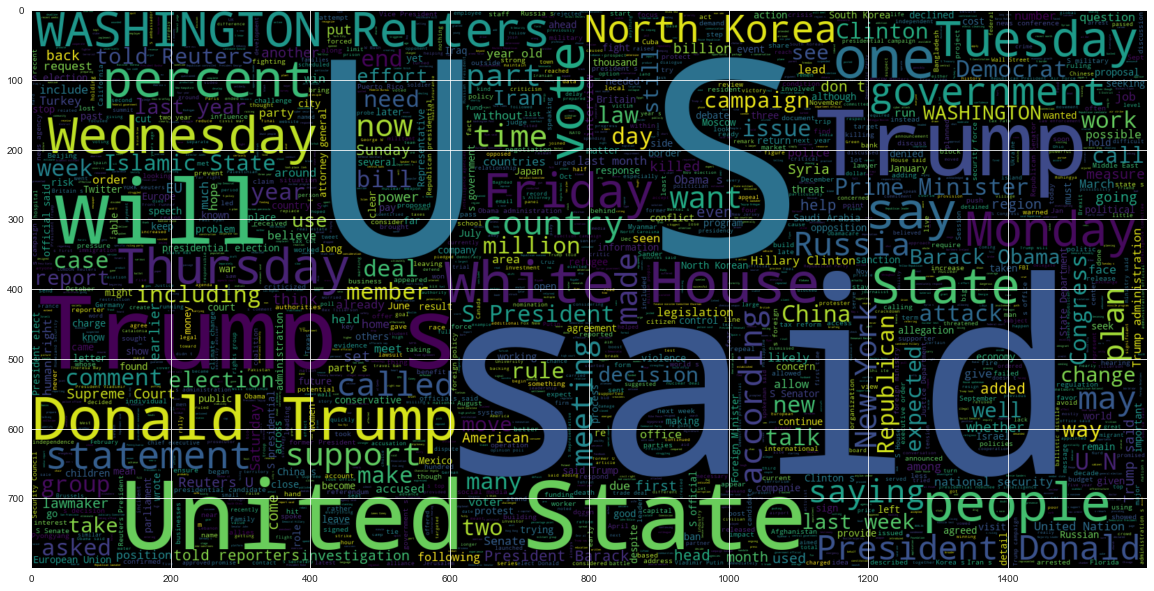

In [110]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.check == 1].Text))
plt.imshow(wc , interpolation = 'bilinear')

Wordcloud for Fake Text

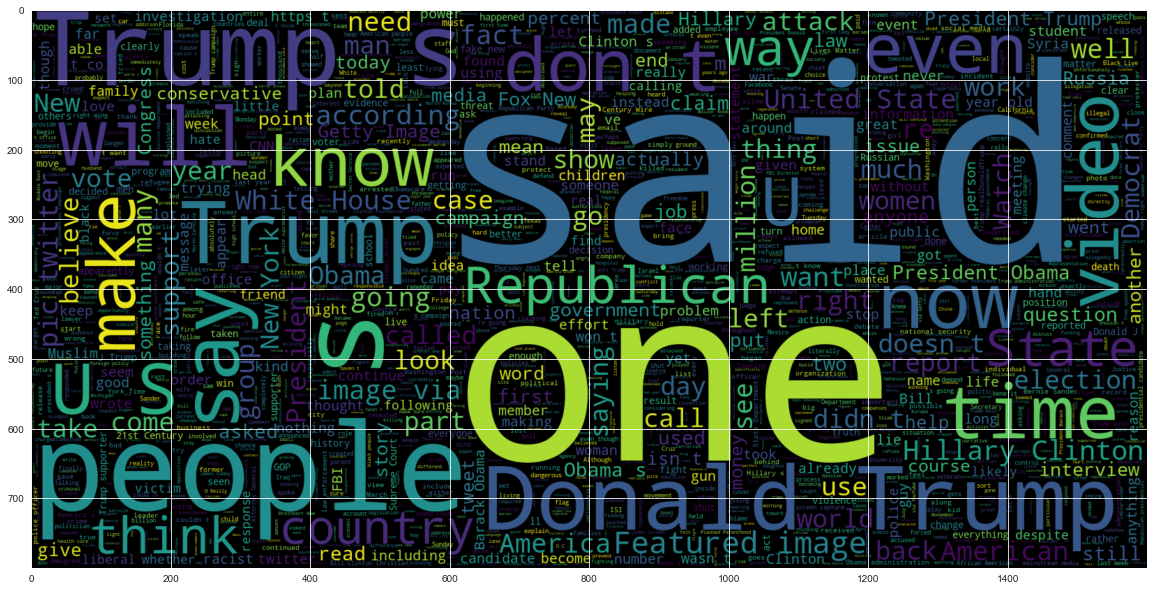

In [111]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.check == 0].Text))
plt.imshow(wc , interpolation = 'bilinear')

Number of characters in texts

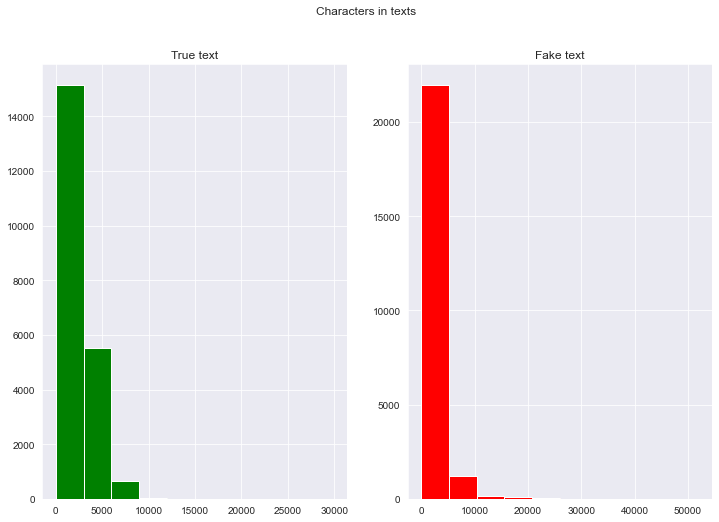

In [146]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['check']==1]['Text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('True text')
text_len=df[df['check']==0]['Text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

The distribution of words in true and fake news seems to be a bit different. 2500 characters are mainly present in original text category while around 5000 characters are mainly present in fake text category.

Number of words in texts

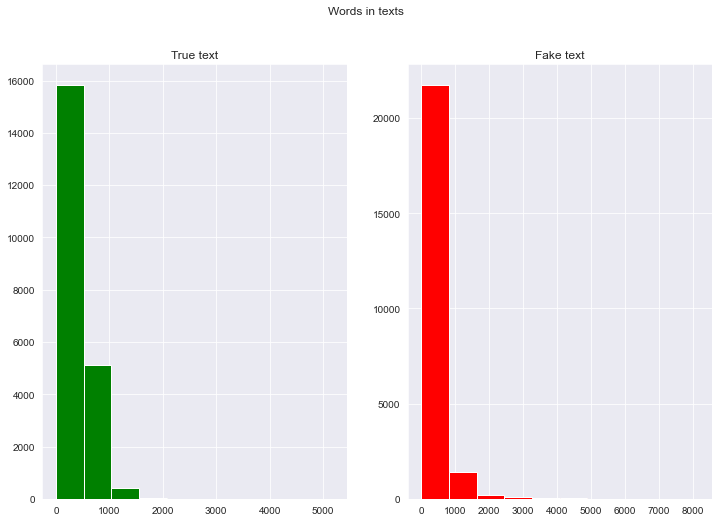

In [118]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['check']==1]['Text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('True text')
text_len=df[df['check']==0]['Text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Average word length in a text

Text(0.5, 0.98, 'Average word length in each text')

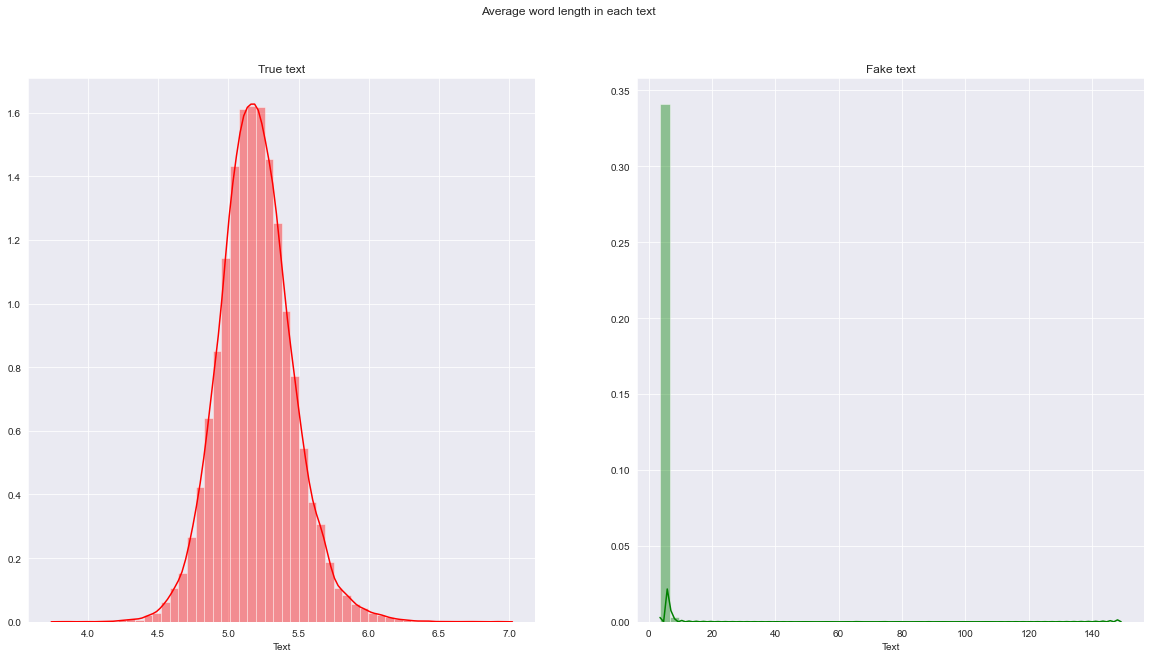

In [132]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10),)
word=df[df['check']==1]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('True text')
word=df[df['check']==0]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

# Preprocessing of Data

In [18]:
ps = PorterStemmer()
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-z_0-9]',' ',df['Text'][i]) #Removing all charecters(,[]{}./ etc) other than numbers and alphabets
    review = review.lower() #lowering the charecters
    review = review.split()
    
    #Removing words which does not affect the sentence meaning. eg. pronouns, articles, etc
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus[1]

'tick time bomb young muslim west sympath terrorist statist shock tell pleas sure share piec hillari voter support candid welcom un vet refuge america open arm name divers obama regim shame american believ someth wrong us suspici radic muslim america barack hussein obama gone way critic christian go far back crusad make point christian commit act violenc muslim also gone way embrac islam small wonder endors ador one radic muslim america leader nation islam loui farrakhan back brussel terror attack worthwhil rememb major muslim west appear truck terror extrem signific number sympathis terror repeatedli attempt justifi attack west terrorisman icm poll 2006 reveal 20 per cent british muslim sympathis 7 7 bomber brought terror street british capit kill 52 injur hundr number rose one four british muslim accord nop research channel 4 british muslim popul 3 million today translat roughli three quarter million terror sympathis peopl uk number rise younger british muslim sure sign radicalis sch

Transforming each and every text in corpus to vector using CountVectorizer  
Here we have considered 10000 most common words with ngram ranging 1-3 in corpus 

In [23]:
cv = CountVectorizer(max_features = 10000, ngram_range = (1,3))
textv = cv.fit_transform(corpus)

Top 10 most common words

In [120]:
sum_words = textv.sum(axis=0)

In [122]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [156]:
words_freq[:10]

[('trump', 149176),
 ('said', 133033),
 ('state', 64796),
 ('presid', 62343),
 ('would', 55662),
 ('peopl', 42608),
 ('year', 42411),
 ('republican', 41585),
 ('say', 41054),
 ('one', 39899)]

In [124]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Unigram Analysis

Text(0, 0.5, 'Common Words')

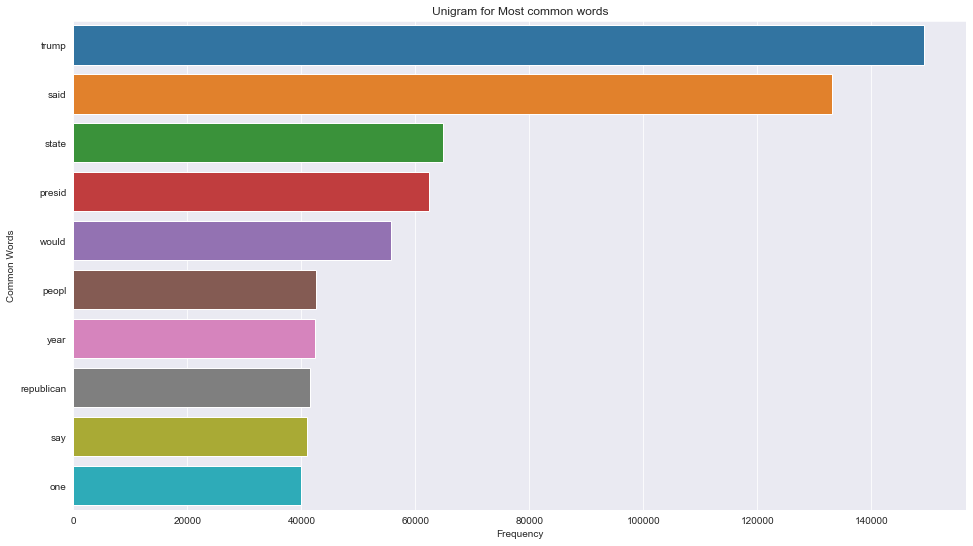

In [148]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(corpus,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))
plt.title('Unigram for Most common words')
plt.xlabel('Frequency')
plt.ylabel('Common Words')

Bigram Analysis

Text(0, 0.5, 'Common Words')

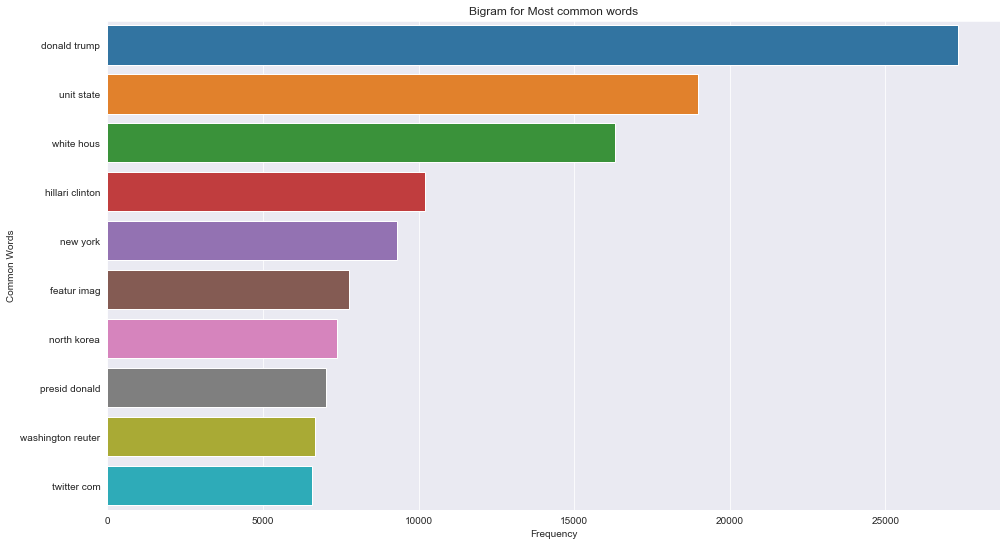

In [149]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(corpus,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.title('Bigram for Most common words')
plt.xlabel('Frequency')
plt.ylabel('Common Words')

Trigram Analysis

Text(0, 0.5, 'Common Words')

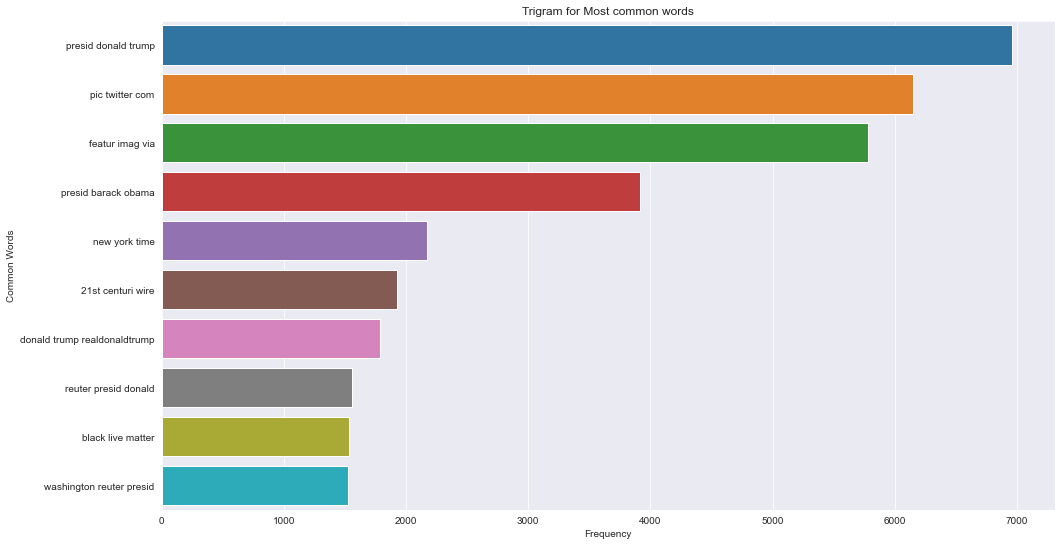

In [150]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(corpus,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.title('Trigram for Most common words')
plt.xlabel('Frequency')
plt.ylabel('Common Words')

Creating DataFrame from the vector we got from CountVectorizer

In [24]:
textv_array = textv.toarray()

In [26]:
cvfeatures = cv.get_feature_names()

In [28]:
cvfeatures

['00',
 '00 pm',
 '000',
 '000 peopl',
 '000 refuge',
 '000 rohingya',
 '000 year',
 '10',
 '10 000',
 '10 billion',
 '10 day',
 '10 million',
 '10 percent',
 '10 year',
 '100',
 '100 000',
 '100 day',
 '100 million',
 '100 percent',
 '10th',
 '11',
 '11 2001',
 '11 attack',
 '11 million',
 '11 year',
 '110',
 '11th',
 '12',
 '12 million',
 '12 percent',
 '12 year',
 '12 year old',
 '120',
 '125',
 '13',
 '13 percent',
 '13 year',
 '130',
 '14',
 '14 year',
 '14 year old',
 '140',
 '15',
 '15 2017',
 '15 percent',
 '15 year',
 '150',
 '150 000',
 '16',
 '16 year',
 '160',
 '17',
 '17 year',
 '17 year old',
 '18',
 '18 month',
 '18 year',
 '180',
 '19',
 '1950',
 '1960',
 '1967',
 '1970',
 '1973',
 '1979',
 '1980',
 '1981',
 '1984',
 '1986',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '1b',
 '1st',
 '20',
 '20 000',
 '20 2017',
 '20 million',
 '20 percent',
 '20 year',
 '200',
 '200 000',
 '2000',
 '2001',
 '2002'

From above cvfeatures there are few countable numerical values which do not have much significance for model training  
Removing such values

In [29]:
dffinal = pd.DataFrame(textv_array,columns=cvfeatures)

In [37]:
dffinal.shape

(44898, 10000)

In [31]:
dffinal.head()

,00,00 pm,000,000 peopl,000 refuge,000 rohingya,000 year,10,10 000,10 billion,...,zero,zika,zika viru,zimbabw,zimbabwean,zink,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
joblib.dump(dffinal.head(),"dffinal_head.csv")

['dffinal_head.csv']

In [35]:
del_features = ['00','000','000 year','10','10 000','100','10th','11','110','11th','12','120','125','13','130','14','140','15','150','150 000','16','160','17','18','180','19','1b','1st','20','20 000','20 2017','200','200 000','2017a','21','22','23','24','25','25 000','250','250 000','26','27','28','28 2016','29','29 2017','2nd','30','30 000','300','300 000','31','32','33','34','35','350','36','37','38','39','40','40 000','400','400 000','41','42','43','44','45','46','47','48','49','4th','50','50 000','500','500 000','51','52','53','54','55','56','57','58','59','5th','60','600','600 000','61','62','63','64','65','66','67','68','69','70','700','71','72','73','74','75','76','77','78','79','80','800','800 000','81','82','83','84','85','86','88','8th','90','900','91','93','95','98','99']
del_features

['00',
 '000',
 '000 year',
 '10',
 '10 000',
 '100',
 '10th',
 '11',
 '110',
 '11th',
 '12',
 '120',
 '125',
 '13',
 '130',
 '14',
 '140',
 '15',
 '150',
 '150 000',
 '16',
 '160',
 '17',
 '18',
 '180',
 '19',
 '1b',
 '1st',
 '20',
 '20 000',
 '20 2017',
 '200',
 '200 000',
 '2017a',
 '21',
 '22',
 '23',
 '24',
 '25',
 '25 000',
 '250',
 '250 000',
 '26',
 '27',
 '28',
 '28 2016',
 '29',
 '29 2017',
 '2nd',
 '30',
 '30 000',
 '300',
 '300 000',
 '31',
 '32',
 '33',
 '34',
 '35',
 '350',
 '36',
 '37',
 '38',
 '39',
 '40',
 '40 000',
 '400',
 '400 000',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '4th',
 '50',
 '50 000',
 '500',
 '500 000',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '600 000',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '700',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '800',
 '800 000',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '88',
 '8th',
 '90',
 '

In [64]:
final_features = []
for i in cvfeatures:
    if i not in del_features:
        final_features.append(i)
len(final_features)

9868

In [100]:
joblib.dump(final_features,'final features') #Saving final_features

['final features']

In [38]:
dffinal.drop(del_features,axis=1,inplace=True)

In [39]:
dffinal.shape

(44898, 9868)

In [159]:
dffinal.head()

,00 pm,000 peopl,000 refuge,000 rohingya,10 billion,10 day,10 million,10 percent,10 year,100 000,...,zero,zika,zika viru,zimbabw,zimbabwean,zink,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Training Model

In [41]:
from sklearn.model_selection import train_test_split

Using 75 percent data for training and 25 percent for testing the model

In [43]:
X_train,X_test,y_train,y_test=train_test_split(dffinal,df.check,test_size=0.25)
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (33673, 9868)
Shape of y_train :  (33673,)
Shape of X_test :  (11225, 9868)
Shape of y_test :  (11225,)


Training model using Logistic Regression Algorithm

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\jagta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
model.score(X_test,y_test)*100

99.67037861915368

After training the model we got 99.7% accuracy

Training model using another algorithm - MultinomialNB Algorithm

In [52]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [53]:
model1.score(X_test,y_test)*100

96.46325167037863

Here we got the 96.46% accuracy

We got better accuracy with Logistic Regression Algorithm so selcting it as final model

# Saving the Logistic Regression Model using joblib

In [47]:
joblib.dump(model,'FNC log_reg model')

['FNC log_reg model']

# Testing the Model

In [49]:
pred = model.predict(X_test)

Creating Confusion Matrix for comparing predicted output with actual output

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

In [152]:
cm = pd.DataFrame(cm , index = ['Fake','True'] , columns = ['Fake','True'])
cm

,Fake,True
Fake,5855,20
True,17,5333


In [168]:
joblib.dump(cm,'Count Vectorizer.csv')

['Count Vectorizer.csv']

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

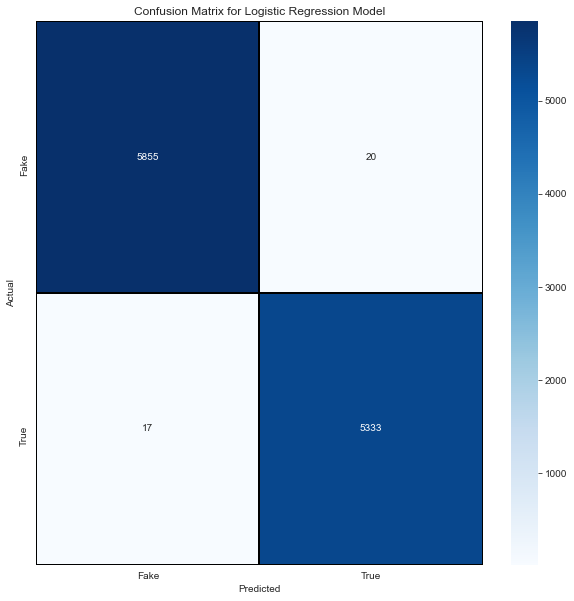

In [151]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Logistic Regression Model')